# Validation on a simulated dataset

In this Jupyter notebook we evaluate if UBayFS selects the correct features in a simulated dataset where we know the ground truth. The dataset was simulated in ``R`` according to the script provided under [this link](https://github.com/annajenul/UBayFS_experiments/blob/main/Experiment_1/1_a_additive_classification.R).

We simulate 30 features through a multivariate normal distribution, where each feature has mean 0 and standard deviation 1. The target $y$ is generated through an additive model consisting of the first four features ($f_0,f_1,f_2,f_3$) plus some small error $\varepsilon \sim \mathcal{N}(0,1)$:

$y = -2\cdot \sin(2f_0) + f_1^2 + f_2 + \exp(-f_3) + \varepsilon$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
sys.path.append("../../src/UBayFS")
from UBaymodel import UBaymodel
from UBayconstraint import UBayconstraint

In [2]:
data = pd.read_csv("./data/simulation/data.csv")
labels = pd.read_csv("./data/simulation/labels.csv")

The correlation matrix shows that $f_0, f_2$ and $f_3$ have a higher correlation with the target compared to the remaining features. Feature $f_1$ has a low correlation with the target even though it is part of the target generation. Hence, we cannot assume that UBayFS selects $f_1$ with a higher probability than the remaining features. the four features with the highest absolute correlation with the target are $f_0, f_2, f_3,$ and $f_{13}$.

<AxesSubplot:>

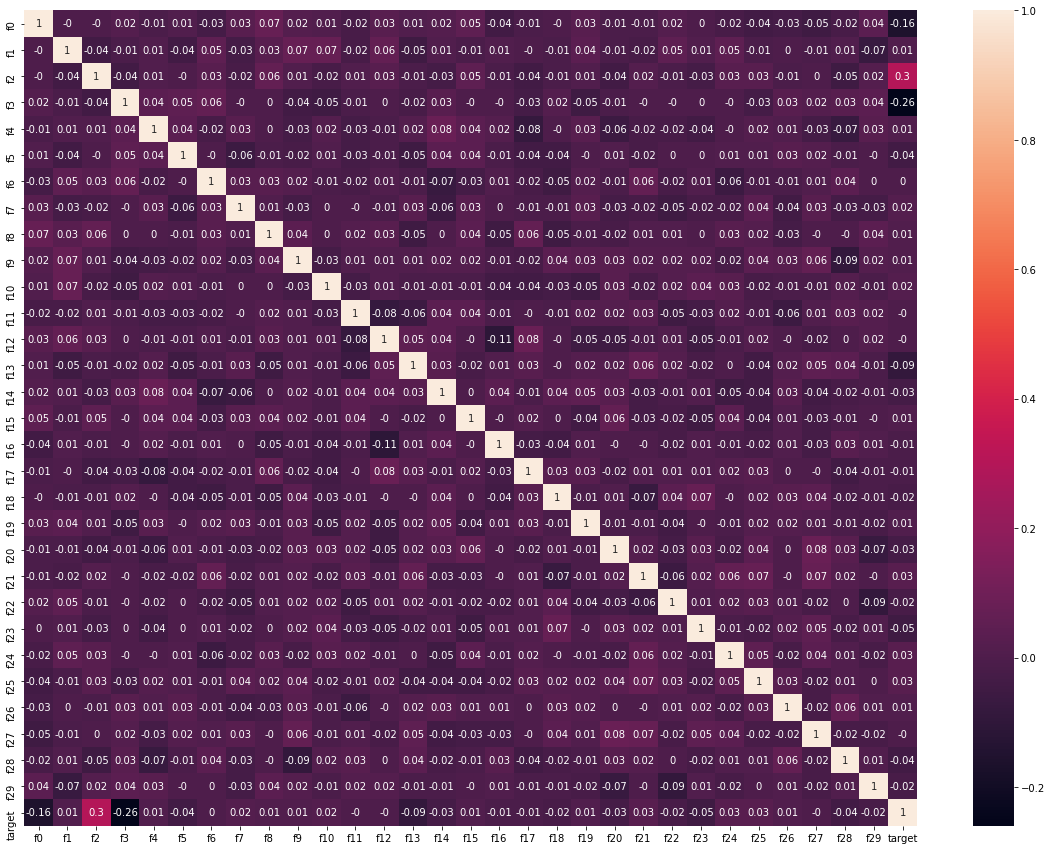

In [11]:
plt.subplots(figsize=(20,15))
data1 = data.copy()
data1["target"] = labels
sns.heatmap(np.round(data1.corr(), 2), annot=True, xticklabels=True)

In [5]:
model = UBaymodel(data=data,
                 target = labels,
                 feat_names = [],
                 weights = [0.01],
                 M = 30, random_state=10,
                 method=[ "mrmr"],
                 nr_features = 4,
                 constraints = UBayconstraint(rho=np.array([np.Inf]), 
                             constraint_types=["max_size"], 
                             constraint_vars=[4], 
                             num_elements=data.shape[1])
)

In [6]:
result = model.train()
result[1]

['f0', 'f2', 'f3', 'f13']

UBayFS with a max-size constraint of four features selects the expected features. Hence, this study shows that the method works well. By increasing the prior weight for feature $f_1$ we can almost "force" the model to select the feature.

In [12]:
weights = np.repeat(0.1,30)
weights[1] = 100
model.setWeights(weights)

In [13]:
result = model.train()
result[1]

['f0', 'f1', 'f2', 'f3']